In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import silhouette_samples, silhouette_score
import copy
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from scipy.cluster.hierarchy import dendrogram
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import davies_bouldin_score

In [ ]:
df=pd.read_csv('football_data.csv')

In [ ]:
cols=['Age','Overall', 'Potential', 'Value', 'Position','Nationality','Club','Wage', 'Special',
       'International Reputation', 'Weak Foot',
       'Skill Moves', 'Height', 'Weight','Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
       'GKKicking', 'GKPositioning', 'GKReflexes', 'Release Clause']

In [ ]:
df1=df[cols].copy()

In [ ]:
def findMagnitude(i):
    
    if str(i)=='nan':
        return np.nan
    j=i[1:]
    val=1
    if 'M' in j:
        val=1000000
        j=j[:-1]
    if 'K' in j:
        val=1000
        j=j[:-1]

    return(float(j)*val)

def weightVal(val):
    if str(val)=='nan':
        return np.nan
    if 'lbs' in val:
        val=val.strip('lbs')
    return float(val)

def heightVal(i):
    if str(i)=='nan':
        return np.nan
    if '\'' in i:
        j,k=i.split('\'')
    return float(j)*12+float(k)

In [ ]:
df1['Value']=df1['Value'].apply(findMagnitude)
df1['Release Clause']=df1['Release Clause'].apply(findMagnitude)
df1['Wage']=df1['Wage'].apply(findMagnitude)
df1['Weight']=df1['Weight'].apply(weightVal)
df1['Height']=df1['Height'].apply(heightVal)
df1=df1.fillna(df1.mean())

# Data Visualization

Text(0.02, 0.5, 'Count')

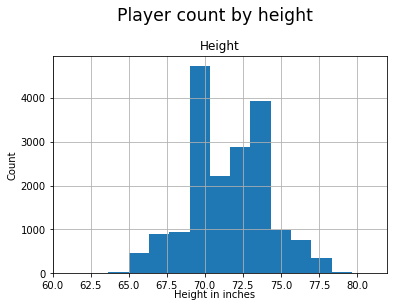

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=1, sharex=True, sharey=True)
df1.hist(column='Height',bins=15 ,ax=axes)
plt.suptitle('Player count by height', x=0.5, y=1.05, ha='center', fontsize='xx-large')
fig.text(0.5, 0.04, 'Height in inches', ha='center')
fig.text(0.02, 0.5, 'Count', va='center', rotation='vertical')

Text(0.02, 0.5, 'Count')

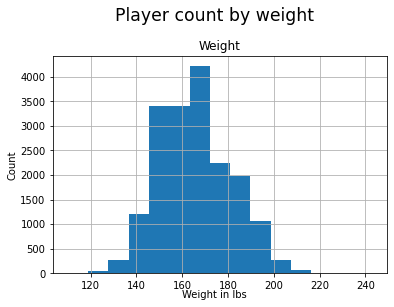

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=1, sharex=True, sharey=True)
df1.hist(column='Weight', bins=15,ax=axes)
plt.suptitle('Player count by weight', x=0.5, y=1.05, ha='center', fontsize='xx-large')
fig.text(0.5, 0.04, 'Weight in lbs', ha='center')
fig.text(0.02, 0.5, 'Count', va='center', rotation='vertical')

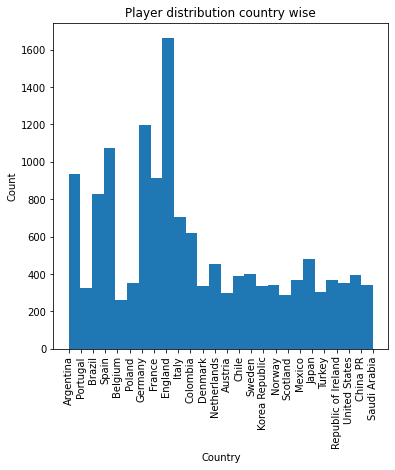

In [ ]:
cn = df1['Nationality']
cnv = cn.value_counts()
cn=pd.unique(cn)
cn=[i for i in cn if cnv[i]>250]
cnw=[cnv[i] for i in cn]
plt.figure(figsize=(6,6))
plt.hist(cn, weights=cnw, bins=len(cn))
plt.xticks(rotation='vertical')
plt.ylabel('Count')
plt.xlabel('Country')
plt.title('Player distribution country wise')
plt.show()

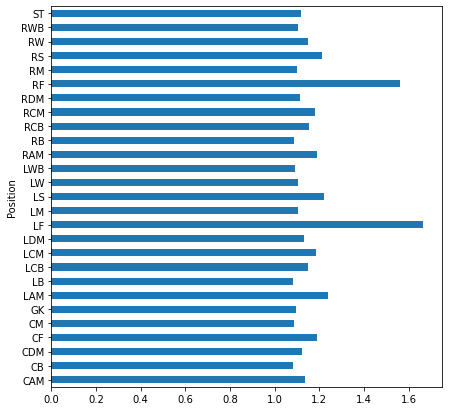

In [ ]:
df1 = df1.groupby('Position').mean()
df1['International Reputation'].plot(kind='barh', figsize=(7,7))

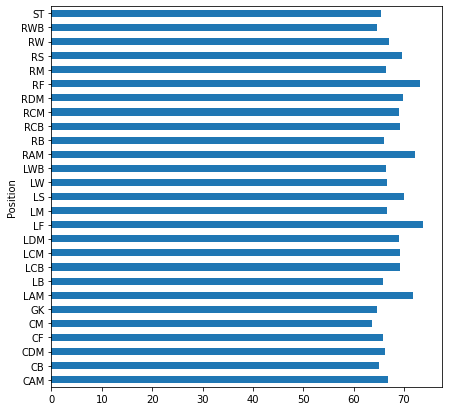

In [ ]:
df1 = df1.groupby('Position').mean()
df1['Overall'].plot(kind='barh', figsize=(7,7))

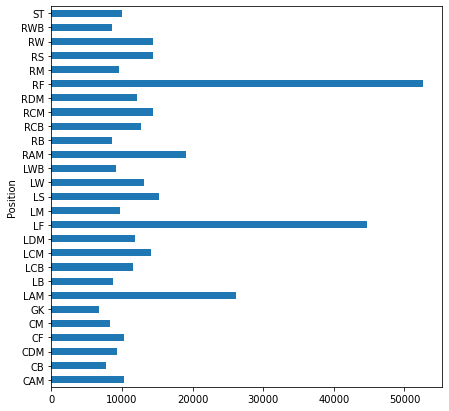

In [ ]:
df1 = df1.groupby('Position').mean()
df1['Wage'].plot(kind='barh', figsize=(7,7))

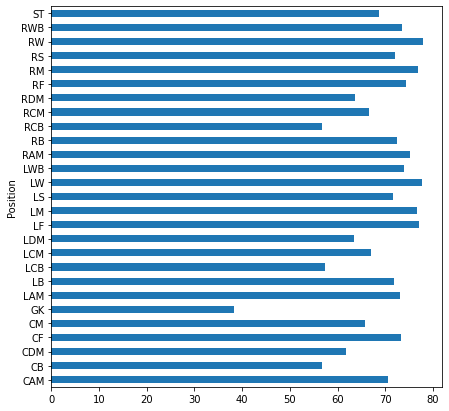

In [ ]:
df1 = df1.groupby('Position').mean()
df1['Acceleration'].plot(kind='barh', figsize=(7,7))

**Outliers using Z-score:**


The data points which are way too far from zero will be treated as the outliers. Here taking z value = 3.5 for attribute "Overall" , we found below outliers:

In [ ]:
import scipy
zx = scipy.stats.zscore(df2[['Overall']])
ans=[]
for i in range(len(zx)):
  if zx[i]>3.5 or zx[i]<-3.5:
    ans.append(df[i:i+1]['Name'])
for i in ans:
      print(i)

0    L. Messi
Name: Name, dtype: object
1    Cristiano Ronaldo
Name: Name, dtype: object
2    Neymar Jr
Name: Name, dtype: object
3    De Gea
Name: Name, dtype: object
4    K. De Bruyne
Name: Name, dtype: object
5    E. Hazard
Name: Name, dtype: object
6    L. Modrić
Name: Name, dtype: object
7    L. Suárez
Name: Name, dtype: object
8    Sergio Ramos
Name: Name, dtype: object


# Data Cleaning and Scaling

In [ ]:
cols=['Age','Overall', 'Potential', 'Value','Wage', 'Special',
       'International Reputation', 'Weak Foot',
       'Skill Moves', 'Height', 'Weight','Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
       'GKKicking', 'GKPositioning', 'GKReflexes', 'Release Clause']

In [ ]:
df2=df[cols].copy()

In [ ]:
df2['Value']=df2['Value'].apply(findMagnitude)
df2['Release Clause']=df2['Release Clause'].apply(findMagnitude)
df2['Wage']=df2['Wage'].apply(findMagnitude)
df2['Weight']=df2['Weight'].apply(weightVal)
df2['Height']=df2['Height'].apply(heightVal)
df2=df2.fillna(df2.mean())

In [ ]:
x=np.array(df2)
scaler = MinMaxScaler()
x=scaler.fit_transform(x)

# K Means Clustering

Here we apply the k-means clustering algorithms to cluster the data for values of k=2,3,5 and 7. For plotting the data we first apply PCA to reduce the dimension to 3 and plot the points using 3d scatter plots. We can see the clusters formed with different colours in the scatter plot.


K= 2 Silhoute score 0.5338305201049188 Davies bouldin score 0.6282538775875093
K= 3 Silhoute score 0.2539951147339688 Davies bouldin score 1.3485328856491454
K= 5 Silhoute score 0.2302291888016746 Davies bouldin score 1.4652018638797104
K= 7 Silhoute score 0.19517216383264804 Davies bouldin score 1.6445078671592663


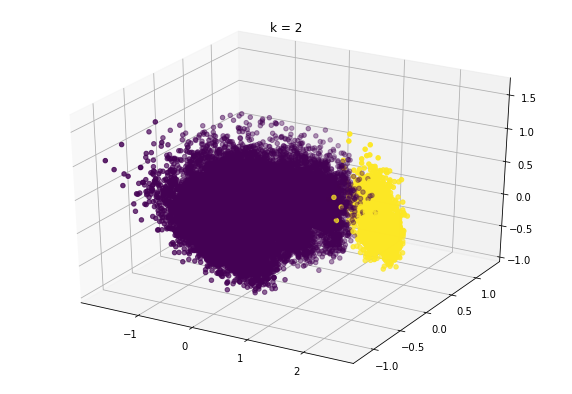

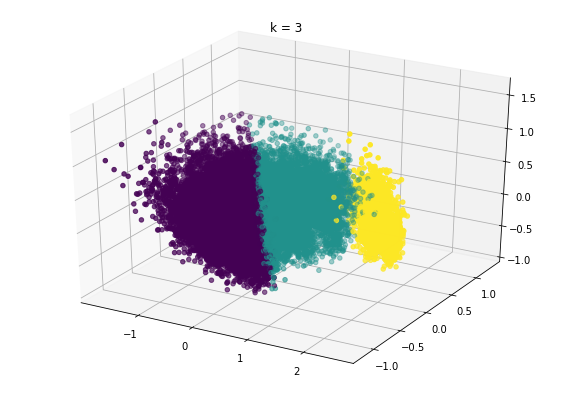

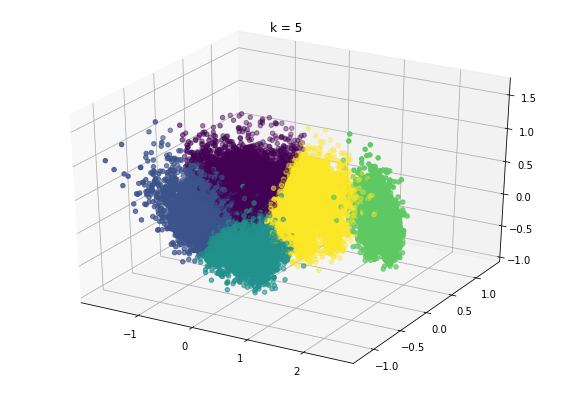

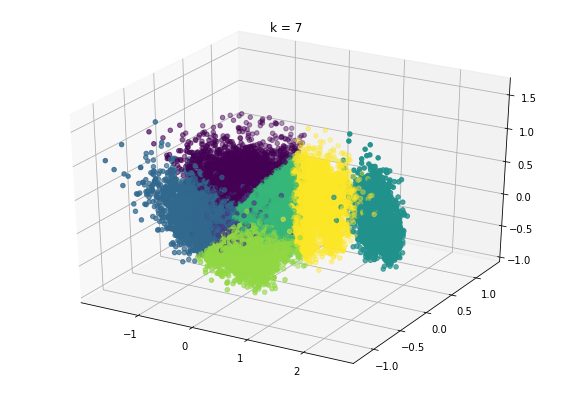

In [ ]:
li=[2,3,5,7]
ss=np.array([])
n,m=x.shape
for k in li:

    ans=0
    centroids=np.array([]).reshape(m,0)
    for i in range(k):
        centroids = np.column_stack((centroids,x[i]))

    centroids=np.transpose(centroids)

    iteration=100
    cluster=np.zeros([n])

    for it in range(iteration):
        prev=centroids.copy()
        for i in range(x.shape[0]):
            distance=np.sum((centroids-x[i])**2,axis=1)
            cluster[i]=np.argmin(distance)

        for i in range(k):
            centroids[i]=np.mean(x[cluster==i],axis=0)

        if(np.sum(np.sum(abs(prev-centroids),axis=1))==0):
            break
      
    print('K=',k,end=' ')
    print('Silhoute score',silhouette_score(x, cluster, metric='euclidean'),end=' ')
    print('Davies bouldin score',davies_bouldin_score(x,cluster))
    pca=PCA(n_components=3)
    y=pca.fit_transform(x)

    fig = plt.figure(figsize = (10, 7)) 
    ax = plt.axes(projection ="3d") 
    plt.title('k = '+str(k))
    ax.scatter3D(y[:,0],y[:,1],y[:,2],c=cluster)
    
    for i in range(k):
        sum=np.sum(np.sum((centroids[i]-x[cluster==i])**2,axis=1))
        ans=ans+sum
        
    ss=np.append(ss,ans)

Text(0, 0.5, 'Within cluster sum of square')

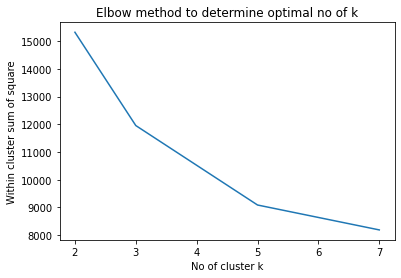

In [ ]:
plt.plot(li,ss)
plt.title('Elbow method to determine optimal no of k')
plt.xlabel('No of cluster k')
plt.ylabel('Within cluster sum of square')

**Evaluating clusters:**

Here we can only use "Internal Evaluation" to evaluate the clusters formed, as there are no ground truth values provided.
We use following methods to assess the quality of clusters formed based on internal criterion:

1) Davies–Bouldin index: For k=5 we get Davies bouldin score as 1.4652018638797104

2) Silhouette coefficient: For K= 5 we get Silhouette score as 0.2302291888016746


# Agglomerative Clustering

The agglomerative clustering is the most common type of bottom up hierarchical clustering used to cluster the data.


In [ ]:
def plot_dendrogram(model, **kwargs):
    
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1 
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)
    
    dendrogram(linkage_matrix, **kwargs)

**Selecting no. of clusters:**
Dendrogram is a way to visualize the clusters and then decide the suitable number of clusters.
The height of the dendrogram indicates the order in which the clusters were joined.

The longest vertical distance without any horizontal line passing through it is selected and a horizontal line is drawn through it. The number of vertical lines this newly created horizontal line passes is equal to the number of clusters.


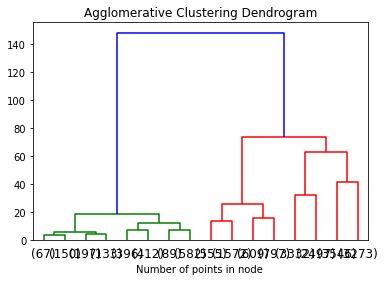

In [ ]:
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)
model.fit(x)
plt.title('Agglomerative Clustering Dendrogram')
plot_dendrogram(model, truncate_mode='level', p=3)
plt.xlabel("Number of points in node ")
plt.show()

In [ ]:
model = AgglomerativeClustering( n_clusters=2)
model.fit(x)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=2)

In [ ]:
 print('Silhoute score',silhouette_score(x, model.labels_, metric='euclidean'),end=' ')
 print('Davies bouldin score',davies_bouldin_score(x,model.labels_))

Silhoute score 0.5338719851481576 Davies bouldin score 0.6279093007162538


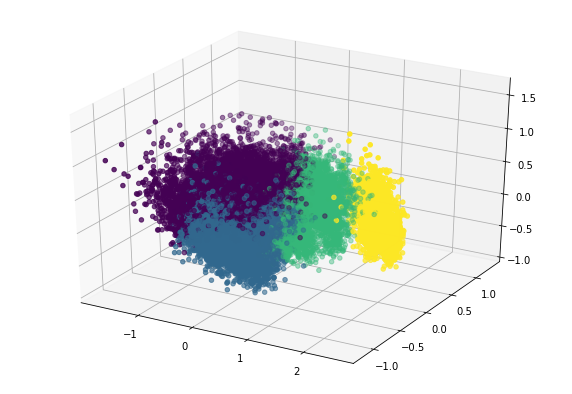

In [ ]:
pca=PCA(n_components=3)
y=pca.fit_transform(x)
fig = plt.figure(figsize = (10, 7)) 
ax = plt.axes(projection ="3d") 
ax.scatter3D(y[:,0],y[:,1],y[:,2],c=model.labels_);

**Evaluating clusters:**

Here we can only use "Internal Evaluation" to evaluate the clusters formed, as there are no ground truth values provided.
We use following methods to assess the quality of clusters formed based on internal criterion:

1) Davies–Bouldin index:0.5338719851481576.

2) Silhouette coefficient:  0.6279093007162538


# DBSCAN

**Selecting epsilon:**
There are various aspects for choosing an epsilon. One way is to find a suitable value for epsilon by calculating the distance to the nearest n points(using knn) for each point, sorting and plotting the results. Then we look to see where the change is most pronounced and select that as epsilon. The optimal value for epsilon will be found at the point of maximum curvature(knee point). 
Here we get knee at epsilon = 0.7


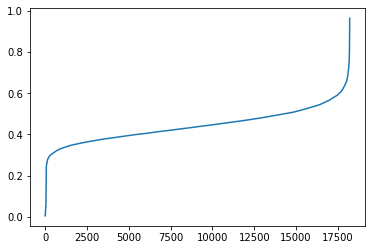

In [ ]:
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(x)
distances, indices = nbrs.kneighbors(x)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

**Selecting minPts:**
There is no general way of choosing minPts, however low minPts means it will build more clusters from outliers, therefore we don't choose a too small value for it.

Here we get the best silhouette score for min points 9.


In [ ]:
samples=[5,7,9,11]
scores=[]
for i in samples:
  model1 = DBSCAN(eps=0.7, min_samples=i).fit(x)
  labels = model1.labels_
  scores=np.append(scores,silhouette_score(x, model1.labels_, metric='euclidean'))

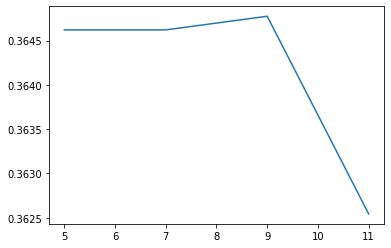

In [ ]:
plt.plot(samples,scores)

In [ ]:
model1 = DBSCAN(eps=0.7, min_samples=9).fit(x)
labels = model1.labels_
unique, counts = np.unique(labels, return_counts=True)
dict(zip(unique, counts))
print('Silhoute score',silhouette_score(x, model1.labels_, metric='euclidean'),end=' ')
print('Davies bouldin score',davies_bouldin_score(x,model1.labels_))

Silhoute score 0.3647742120572446 Davies bouldin score 2.812169523204924


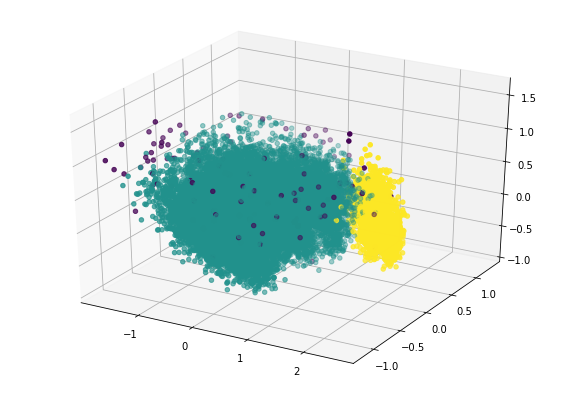

In [ ]:
pca=PCA(n_components=3)
y=pca.fit_transform(x)
fig = plt.figure(figsize = (10, 7)) 
ax = plt.axes(projection ="3d") 
ax.scatter3D(y[:,0],y[:,1],y[:,2],c=labels);

# Outliers:
We get the following entries in the dataset as outliers.

Using the DBSCAN algorithm(for epsilon=0.7 and minPts=9), we found 110 outliers( samples labelled as "-1"). Analyzing these outliers, we found that best football players like Messi and Ronaldo belong to the outlier samples. This is expected as stats of these players are much better than rest of the players and hence these players are outliers.


In [ ]:
print('No of outliers =',df[model1.labels_==-1].shape[0])
df[model1.labels_==-1]

No of outliers = 110


,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,...,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,€110.5M,€565K,2202,Left,5.0,4.0,4.0,Medium/ Medium,Messi,Yes,RF,10.0,"Jul 1, 2004",NaN,2021,5'7,159lbs,88+2,88+2,88+2,92+2,93+2,93+2,93+2,92+2,93+2,93+2,93+2,91+2,...,59+2,47+2,47+2,47+2,59+2,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,€77M,€405K,2228,Right,5.0,4.0,5.0,High/ Low,C. Ronaldo,Yes,ST,7.0,"Jul 10, 2018",NaN,2022,6'2,183lbs,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,...,61+3,53+3,53+3,53+3,61+3,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,€118.5M,€290K,2143,Right,5.0,5.0,5.0,High/ Medium,Neymar,Yes,LW,10.0,"Aug 3, 2017",NaN,2022,5'9,150lbs,84+3,84+3,84+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,88+3,...,60+3,47+3,47+3,47+3,60+3,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,€72M,€260K,1471,Right,4.0,3.0,1.0,Medium/ Medium,Lean,Yes,GK,1.0,"Jul 1, 2011",NaN,2020,6'4,168lbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,€102M,€355K,2281,Right,4.0,5.0,4.0,High/ High,Normal,Yes,RCM,7.0,"Aug 30, 2015",NaN,2023,5'11,154lbs,82+3,82+3,82+3,87+3,87+3,87+3,87+3,87+3,88+3,88+3,88+3,88+3,...,73+3,66+3,66+3,66+3,73+3,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17657,17657,11430,J. McCombe,35,https://cdn.sofifa.org/players/4/19/11430.png,England,https://cdn.sofifa.org/flags/14.png,53,53,Lincoln City,https://cdn.sofifa.org/teams/2/light/149.png,€10K,€2K,1000,Right,1.0,2.0,2.0,Medium/ Medium,Lean,No,CB,2